In [21]:
import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Set a clean aesthetic
sns.set(style="whitegrid")


In [22]:
import pandas as pd 

df = pd.read_csv("/Users/james_peter/Documents/Supply_Predict/data/walmart-sales-prediction-hyd-nov-2023/train.csv")

df.head()
# df.info()
# df.describe()
# df.isnull().sum()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       180 non-null    int64  
 1   Month                      180 non-null    int64  
 2   ProductCategory            180 non-null    object 
 3   Sales(In ThousandDollars)  170 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.8+ KB


In [24]:
# Combine Year and Month into a single datetime column

df['Date'] = pd.to_datetime(df[['Year','Month']].assign(DAY=1))
df = df.sort_values('Date')

In [25]:
df.rename(columns={'Sales(In ThousandDollars)': 'Sales'},inplace = True)

df.head()

,Year,Month,ProductCategory,Sales,Date
0,2009,1,WomenClothing,1755.0,2009-01-01
1,2009,1,MenClothing,524.0,2009-01-01
2,2009,1,OtherClothing,936.0,2009-01-01
3,2009,2,WomenClothing,1729.0,2009-02-01
4,2009,2,MenClothing,496.0,2009-02-01


In [26]:
# Check where sales is missing

missing = df[df['Sales'].isnull()]

print("Missing Sales Entries:\n", missing)

Missing Sales Entries:
      Year  Month ProductCategory  Sales       Date
45   2010      4   WomenClothing    NaN 2010-04-01
47   2010      4   OtherClothing    NaN 2010-04-01
58   2010      8     MenClothing    NaN 2010-08-01
88   2011      6     MenClothing    NaN 2011-06-01
89   2011      6   OtherClothing    NaN 2011-06-01
99   2011     10   WomenClothing    NaN 2011-10-01
113  2012      2   OtherClothing    NaN 2012-02-01
130  2012      8     MenClothing    NaN 2012-08-01
132  2012      9   WomenClothing    NaN 2012-09-01
173  2013     10   OtherClothing    NaN 2013-10-01


In [27]:
#Fill with median sales of same category

df['Sales'] = df.groupby('ProductCategory')['Sales'].transform(lambda x: x.fillna(x.median()))

In [28]:
print(df['Sales'])

0      1755.0
1       524.0
2       936.0
3      1729.0
4       496.0
        ...  
174    3834.0
176    1209.0
178    1085.0
177    4865.0
179    1566.0
Name: Sales, Length: 180, dtype: float64


/var/folders/mq/lcc6b5yd4n9_f3f080j3bvwc0000gn/T/ipykernel_96651/3571330541.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='Date', y='Sales', ci =None)


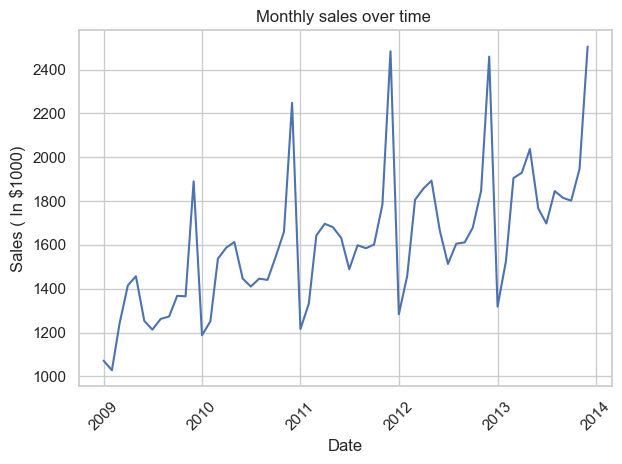

In [29]:
#plotting sales trend over time

plt.Figure(figsize=(12,6))
sns.lineplot(data=df,x='Date', y='Sales', ci =None)
plt.title("Monthly sales over time ")
plt.xlabel("Date")
plt.ylabel("Sales ( In $1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/mq/lcc6b5yd4n9_f3f080j3bvwc0000gn/T/ipykernel_96651/2028687465.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Date', y='Sales', hue='ProductCategory', ci=None)


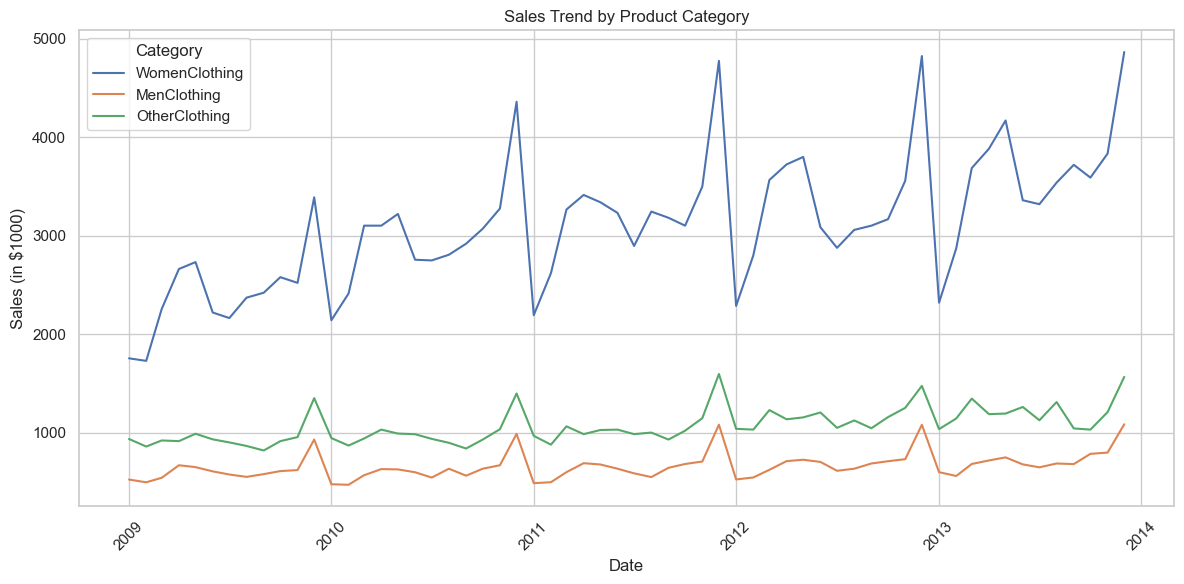

In [30]:
#Plotting  Sales by Product Category Over Time

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Sales', hue='ProductCategory', ci=None)
plt.title("Sales Trend by Product Category")
plt.xlabel("Date")
plt.ylabel("Sales (in $1000)")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

/var/folders/mq/lcc6b5yd4n9_f3f080j3bvwc0000gn/T/ipykernel_96651/4151802693.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='ProductCategory', y='Sales', estimator='mean', ci=None)


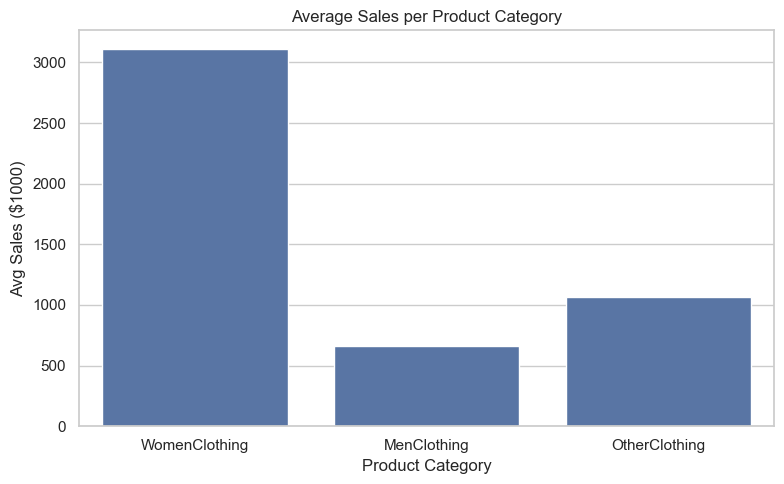

In [31]:
# Average Sales Per Category
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='ProductCategory', y='Sales', estimator='mean', ci=None)
plt.title("Average Sales per Product Category")
plt.ylabel("Avg Sales ($1000)")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()


In [32]:
# Feature Engineering so model understands data better

#Adding Time features 

df['Month_Name']= df['Date'].dt.month_name()
df['Month_Num']= df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year']= df['Date'].dt.year

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             180 non-null    int32         
 1   Month            180 non-null    int64         
 2   ProductCategory  180 non-null    object        
 3   Sales            180 non-null    float64       
 4   Date             180 non-null    datetime64[ns]
 5   Month_Name       180 non-null    object        
 6   Month_Num        180 non-null    int32         
 7   Quarter          180 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(2)
memory usage: 10.5+ KB


In [33]:
#encode product category 

from xgboost import XGBRegressor

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Category_Code'] = le.fit_transform(df['ProductCategory'])

In [34]:
print(df.columns)

Index(['Year', 'Month', 'ProductCategory', 'Sales', 'Date', 'Month_Name',
       'Month_Num', 'Quarter', 'Category_Code'],
      dtype='object')


In [35]:
df[['ProductCategory', 'Category_Code']].drop_duplicates()

,ProductCategory,Category_Code
0,WomenClothing,2
1,MenClothing,0
2,OtherClothing,1


In [36]:
#prepare for modelling 

features= ['Month_Num', 'Quarter', 'Year', 'Category_Code']

X= df[features]
y= df['Sales']


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [38]:
#training model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [39]:
# Evaluating the model

from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")

XGBoost MAE: 65.32
XGBoost RMSE: 91.02


In [51]:
import joblib


joblib.dump(xgb_model, '/Users/james_peter/Documents/Supply_Predict/models/xgb_sales_model.pkl')

joblib.dump(le, '/Users/james_peter/Documents/Supply_Predict/models/category_encoder.pkl')


['/Users/james_peter/Documents/Supply_Predict/models/category_encoder.pkl']

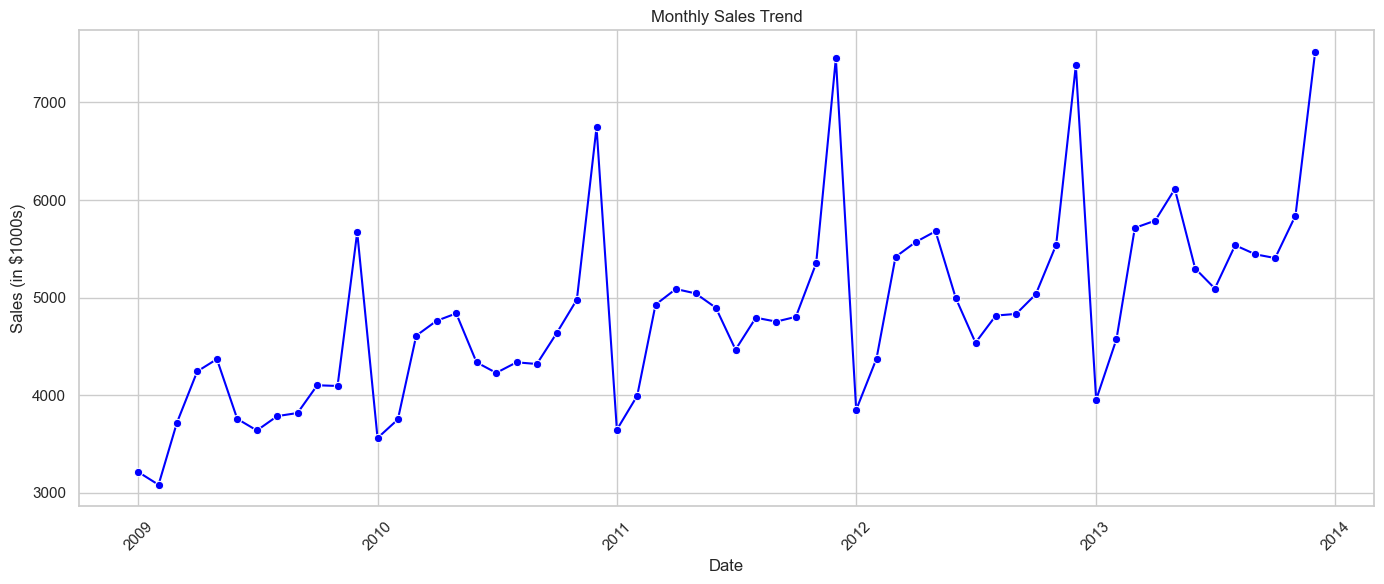

In [40]:
#Monthly Sales trends 
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregated by month
monthly_sales = df.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales (in $1000s)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/mq/lcc6b5yd4n9_f3f080j3bvwc0000gn/T/ipykernel_96651/1206189813.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='ProductCategory', y='Sales', estimator=sum, errorbar=None, palette='viridis')


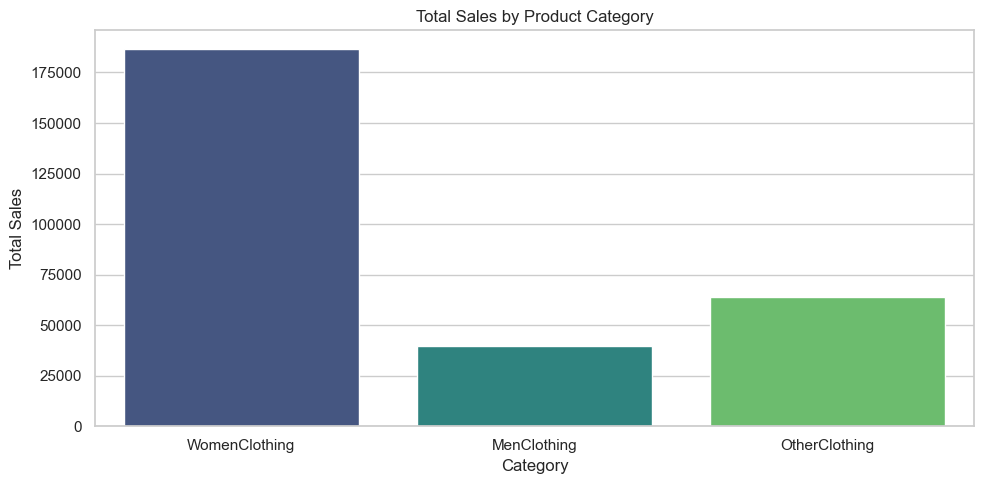

In [42]:
# Plotted by Product Category

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='ProductCategory', y='Sales', estimator=sum, errorbar=None, palette='viridis')
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


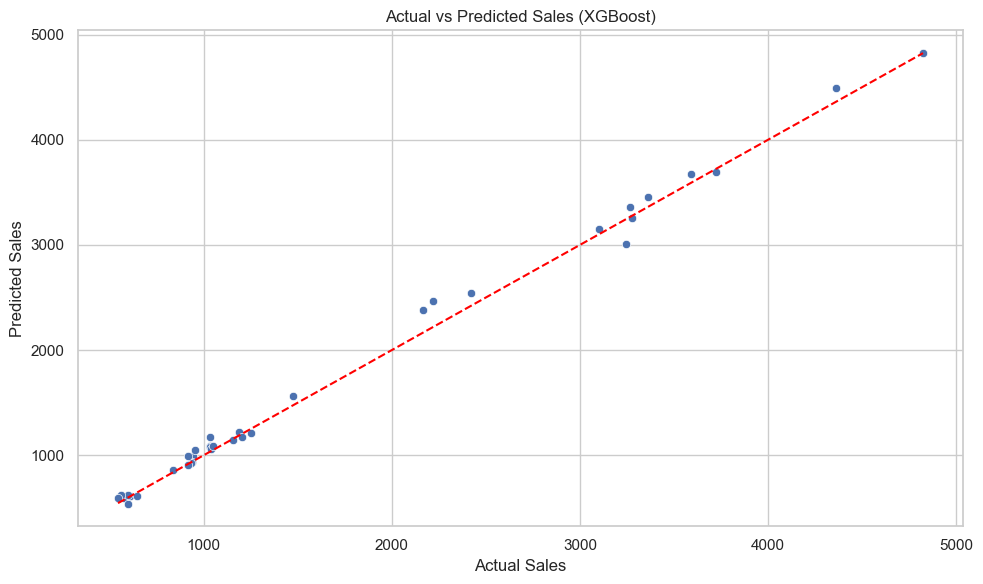

In [43]:
# Actual vs Predicted plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (XGBoost)")
plt.tight_layout()
plt.show()


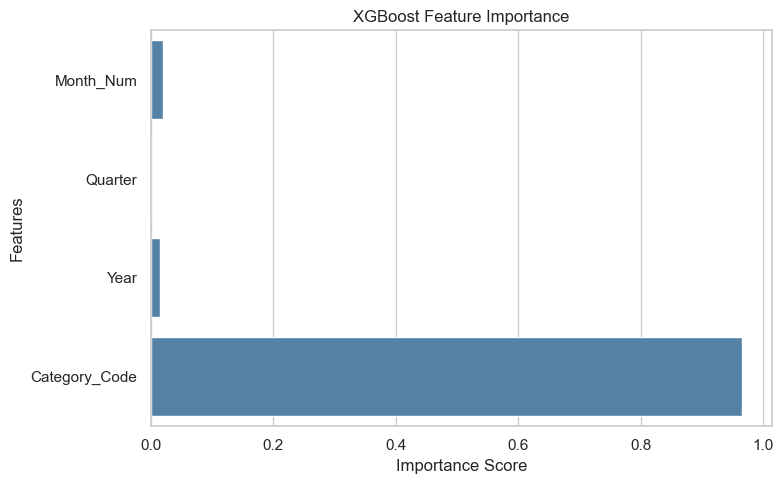

In [46]:
#XGBoost Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, color="steelblue")
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [47]:
# Forecast Example: Predict Future Sales
# Using the trained XGBoost model, we’ll forecast expected sales for upcoming months in each product category.

future_data = pd.DataFrame({
    'Month_Num': [8, 8, 8, 9, 9, 9, 10, 10, 10],
    'Quarter':    [3, 3, 3, 3, 3, 3, 4, 4, 4],
    'Year':       [2024]*9,
    'Category_Code': [0, 1, 2]*3  # 0: Women, 1: Men, 2: Other
})


category_map = {0: 'WomenClothing', 1: 'MenClothing', 2: 'OtherClothing'}
future_data['ProductCategory'] = future_data['Category_Code'].map(category_map)

In [48]:
future_data['Predicted_Sales'] = xgb_model.predict(future_data[['Month_Num', 'Quarter', 'Year', 'Category_Code']])


/var/folders/mq/lcc6b5yd4n9_f3f080j3bvwc0000gn/T/ipykernel_96651/4116349436.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/Users/james_peter/Documents/Supply_Predict/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


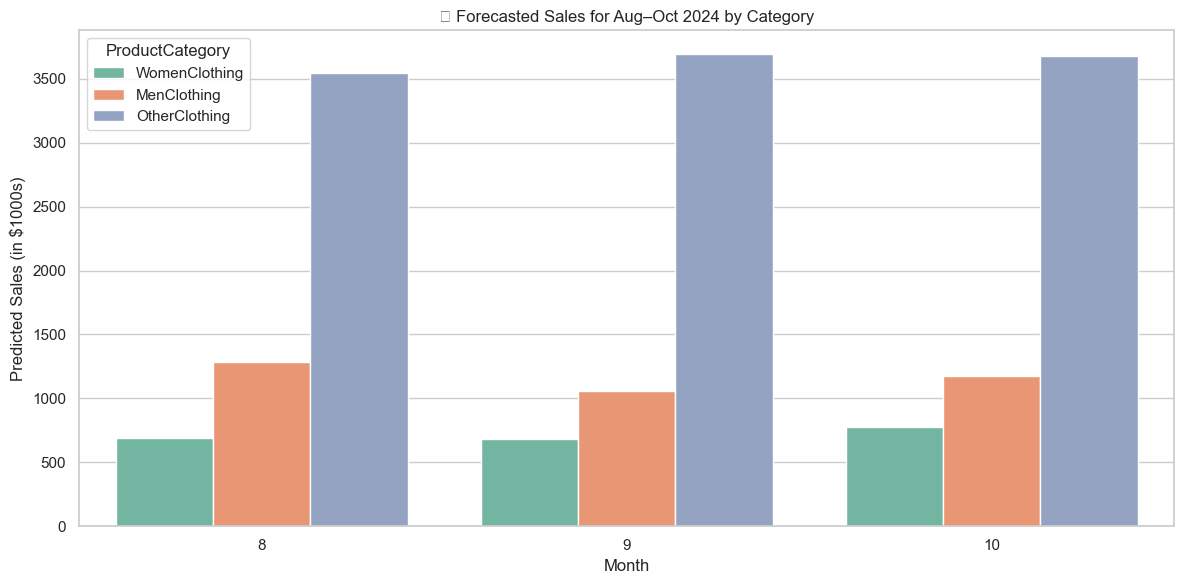

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=future_data, x='Month_Num', y='Predicted_Sales', hue='ProductCategory', palette='Set2')
plt.title('📈 Forecasted Sales for Aug–Oct 2024 by Category')
plt.ylabel('Predicted Sales (in $1000s)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

In [ ]:
# Business Impact Example:
#This forecast helps Walmart prepare for upcoming inventory needs and promotional timing. For example:
#- Expected dip in MenClothing in September? → Reduce orders.
#- Expected WomenClothing spike in October? → Launch promo campaign.

#These forward-looking predictions help reduce stockouts, overstocking, and lost revenue.